In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r'202107-citibike-tripdata.csv/202107-citibike-tripdata.csv')
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['duration_mins'] = (df['ended_at'] - df['started_at']).dt.seconds.div(60)

c:\users\marti\pycharmprojects\muu-final-project\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


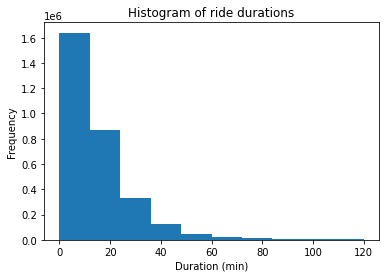

In [16]:
cutoff=120
bins=10
plt.figure()
plt.title('Histogram of ride durations')
plt.ylabel('Frequency')
plt.xlabel('Duration (min)')
plt.hist(df[df['duration_mins'] < cutoff]['duration_mins'], bins=bins)
plt.savefig('Figures/warmup1')

In [17]:
print("Expected duration:", df['duration_mins'].mean())
print("Duration variance:", df['duration_mins'].var())
print("Probability of ride > 20 mins:", len(df[df['duration_mins'] > 20].index) / len(df.index))

Expected duration: 16.884468517209115
Duration variance: 1055.84715184278
Probability of ride > 20 mins: 0.24976098519810266


In [18]:
temp_df = df[df['member_casual'] == 'member']
print("Probability of ride > 20 mins given member:", len(temp_df[temp_df['duration_mins'] > 20].index) / len(temp_df.index))

Probability of ride > 20 mins given member: 0.19422869031097786


In [19]:
temp_df = df[df['duration_mins'] > 25]
print("Probability of being member given > 25 mins ride:", len(temp_df[temp_df['member_casual'] == 'member'].index) / len(temp_df.index))

Probability of being member given > 25 mins ride: 0.4828903995346324


In [20]:
df_reduced = df[['ride_id', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']]
df_reduced.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id
0,247BA541A9674BF3,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12
1,125C9ACA270A5E2D,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10
2,2E26264BCC15BA05,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01
3,A56D23A088563424,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08
4,1451F4BB884C5335,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07


In [21]:
df_reduced.dtypes

ride_id                       object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id                object
dtype: object

In [22]:
df_reduced['start_station_id'].value_counts().head(3)

6912.01    14254
5980.07    13600
6140.05    13488
Name: start_station_id, dtype: int64

In [23]:
df_reduced['end_station_id'].value_counts().head(3)

6912.01    14264
6140.05    13072
5980.07    12868
Name: end_station_id, dtype: int64

In [24]:
df_filtered = df_reduced[(df_reduced['start_station_id'].isin([6912.01, 5980.07, 6140.05]) | df_reduced['end_station_id'].isin([6912.01, 5980.07, 6140.05]))]
df_filtered = df_filtered[(df_filtered['started_at'].dt.weekday != 5) & (df_filtered['started_at'].dt.weekday != 6)]
df_filtered.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id
4566,EC26DBD6D5644D17,2021-07-22 19:09:35,2021-07-22 19:16:34,W 21 St & 6 Ave,6140.05,W 16 St & The High Line,6233.05
4567,3F1FD3CC98295AEE,2021-07-16 14:33:39,2021-07-16 15:06:21,W 21 St & 6 Ave,6140.05,Nassau Ave & Russell St,5581.01
4570,369180EE0EC5318D,2021-07-23 14:19:33,2021-07-23 15:01:10,W 21 St & 6 Ave,6140.05,W 16 St & The High Line,6233.05
4571,3D3B73AFACAB5B09,2021-07-02 17:13:36,2021-07-02 17:25:42,W 21 St & 6 Ave,6140.05,W 16 St & The High Line,6233.05
4589,9997078EE9FBB4E1,2021-07-16 22:08:07,2021-07-16 22:16:44,W 21 St & 6 Ave,6140.05,1 Ave & E 18 St,5854.09


In [25]:
df_691201 = df_filtered[(df_filtered['start_station_id']==6912.01) | (df_filtered['end_station_id']==6912.01)].reset_index()
df_598007 = df_filtered[(df_filtered['start_station_id']==5980.07) | (df_filtered['end_station_id']==5980.07)].reset_index()
df_614005 = df_filtered[(df_filtered['start_station_id']==6140.05) | (df_filtered['end_station_id']==6140.05)].reset_index()

In [26]:
df_598007_start = df_598007[['ride_id', 'started_at', 'ended_at', 'start_station_id']]

In [27]:
df_598007['bike_add']=0
df_598007.loc[df_598007['start_station_id']==5980.07, ['bike_add']] -= 1
df_598007.loc[df_598007['end_station_id']==5980.07, ['bike_add']] += 1
df_598007.sort_values

<bound method DataFrame.sort_values of          index           ride_id          started_at            ended_at  \
0       393216  78E5D281353B15C7 2021-07-20 16:30:06 2021-07-20 16:44:35   
1       393219  A70DF8F6BED68C80 2021-07-20 19:16:24 2021-07-20 19:20:42   
2       393220  7A696CFF498FEC84 2021-07-14 08:48:23 2021-07-14 08:54:51   
3       393221  2DE1E5364205CD5A 2021-07-07 13:45:27 2021-07-07 13:53:22   
4       393223  0FB9A1EB5F16FD26 2021-07-30 22:50:07 2021-07-30 23:01:20   
...        ...               ...                 ...                 ...   
18356  3084007  BF1A9B06A3FD42D8 2021-07-20 19:16:36 2021-07-20 19:29:17   
18357  3084012  D6B4044667CFB83E 2021-07-22 17:06:04 2021-07-22 18:14:40   
18358  3084014  47724BBB314BE512 2021-07-22 20:56:21 2021-07-22 21:32:12   
18359  3084018  475691549D4F29FE 2021-07-30 22:00:42 2021-07-30 22:12:30   
18360  3084036  4C5A6166714C0F66 2021-07-14 20:12:35 2021-07-14 20:30:48   

       start_station_name  start_station_id     

In [28]:
df_598007

,index,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,bike_add
0,393216,78E5D281353B15C7,2021-07-20 16:30:06,2021-07-20 16:44:35,5 Ave & E 29 St,6248.06,E 17 St & Broadway,5980.07,1
1,393219,A70DF8F6BED68C80,2021-07-20 19:16:24,2021-07-20 19:20:42,5 Ave & E 29 St,6248.06,E 17 St & Broadway,5980.07,1
2,393220,7A696CFF498FEC84,2021-07-14 08:48:23,2021-07-14 08:54:51,5 Ave & E 29 St,6248.06,E 17 St & Broadway,5980.07,1
3,393221,2DE1E5364205CD5A,2021-07-07 13:45:27,2021-07-07 13:53:22,5 Ave & E 29 St,6248.06,E 17 St & Broadway,5980.07,1
4,393223,0FB9A1EB5F16FD26,2021-07-30 22:50:07,2021-07-30 23:01:20,E 5 St & Cooper Sq,5712.12,E 17 St & Broadway,5980.07,1
...,...,...,...,...,...,...,...,...,...
18356,3084007,BF1A9B06A3FD42D8,2021-07-20 19:16:36,2021-07-20 19:29:17,E 17 St & Broadway,5980.07,Allen St & Stanton St,5484.09,-1
18357,3084012,D6B4044667CFB83E,2021-07-22 17:06:04,2021-07-22 18:14:40,E 17 St & Broadway,5980.07,Centre St & Chambers St,5207.01,-1
18358,3084014,47724BBB314BE512,2021-07-22 20:56:21,2021-07-22 21:32:12,E 17 St & Broadway,5980.07,1 Ave & E 6 St,5626.15,-1
18359,3084018,475691549D4F29FE,2021-07-30 22:00:42,2021-07-30 22:12:30,E 17 St & Broadway,5980.07,1 Ave & E 6 St,5626.15,-1


In [65]:
import datetime
import seaborn as sns
now = datetime.datetime.now()
midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)

In [70]:
df_598007_grouped = df_598007.groupby(pd.Grouper(key='started_at', freq='10min', origin='epoch'))['bike_add'].sum().reset_index()
df_598007_grouped['minute'] = df_598007_grouped['started_at'].dt.hour*60 + df_598007_grouped['started_at'].dt.minute - midnight.minute

In [71]:
df_598007_grouped

,started_at,bike_add,minute
0,2021-07-01 00:00:00,-1,0
1,2021-07-01 00:10:00,-1,10
2,2021-07-01 00:20:00,-1,20
3,2021-07-01 00:30:00,-1,30
4,2021-07-01 00:40:00,-1,40
...,...,...,...
4315,2021-07-30 23:10:00,-5,1390
4316,2021-07-30 23:20:00,-3,1400
4317,2021-07-30 23:30:00,4,1410
4318,2021-07-30 23:40:00,6,1420


In [75]:
by_interval = df_598007_grouped.groupby('minute')['bike_add'].mean().reset_index()

c:\users\marti\pycharmprojects\muu-final-project\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


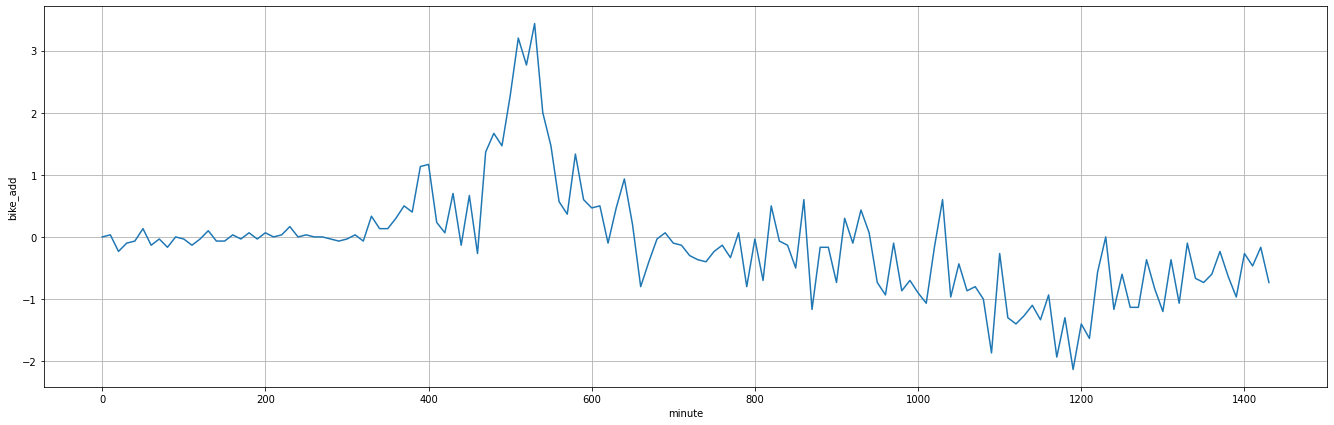

In [77]:
plt.figure(figsize=[23,7])
sns.lineplot(by_interval['minute'], by_interval['bike_add'])
plt.grid(True)

In [69]:
df_598007_grouped

,started_at,bike_add,minute
0,2021-07-01 00:00:00,-1,0
1,2021-07-01 00:10:00,-1,10
2,2021-07-01 00:20:00,-1,20
3,2021-07-01 00:30:00,-1,30
4,2021-07-01 00:40:00,-1,40
...,...,...,...
4315,2021-07-30 23:10:00,-5,1390
4316,2021-07-30 23:20:00,-3,1400
4317,2021-07-30 23:30:00,4,1410
4318,2021-07-30 23:40:00,6,1420
